In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and normalize CIFAR-10 dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train / 255.0                                     # Normalize training images
X_test = X_test / 255.0                                       # Normalize test images
y_train = y_train.squeeze()                                   # Remove extra dimension
y_test = y_test.squeeze()

# Define class labels for display

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Build a CNN model

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),  # 32 filters
    tf.keras.layers.MaxPooling2D((2,2)),                                            # Max pooling
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),                           # 64 filters
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),                                                     # Flatten output
    tf.keras.layers.Dense(64, activation='relu'),                                  # Hidden dense layer
    tf.keras.layers.Dense(10, activation='softmax')                                # Output for 10 classes
])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model

In [6]:
model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=1)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.3487 - loss: 1.7701 - val_accuracy: 0.5280 - val_loss: 1.3235
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5566 - loss: 1.2485 - val_accuracy: 0.6198 - val_loss: 1.0886
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6226 - loss: 1.0740 - val_accuracy: 0.6374 - val_loss: 1.0417
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6594 - loss: 0.9739 - val_accuracy: 0.6744 - val_loss: 0.9226
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6854 - loss: 0.9019 - val_accuracy: 0.6526 - val_loss: 1.0014
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7019 - loss: 0.8422 - val_accuracy: 0.6944 - val_loss: 0.8933
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7254 - loss: 0.7859 - val_accuracy: 0.6928 - val_loss: 0.8880
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7397 - loss: 

# Evaluate the model on test data

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.2f}")

Test Accuracy: 0.70


# Predict and display a few test images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


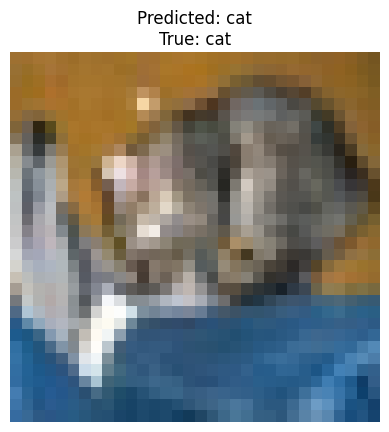

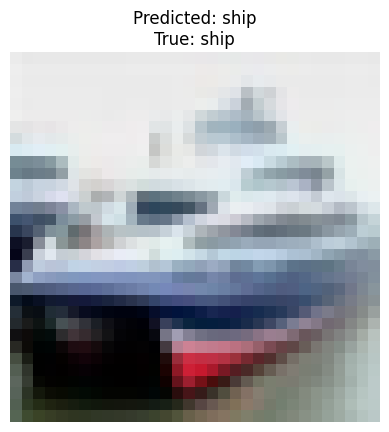

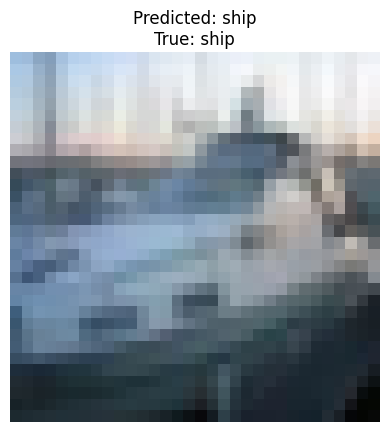

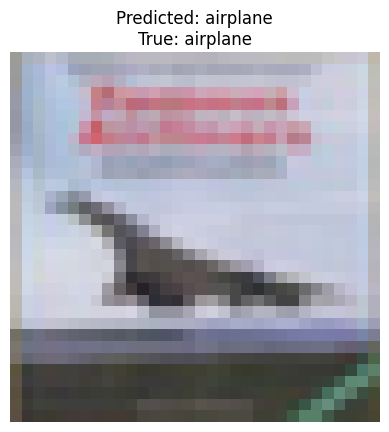

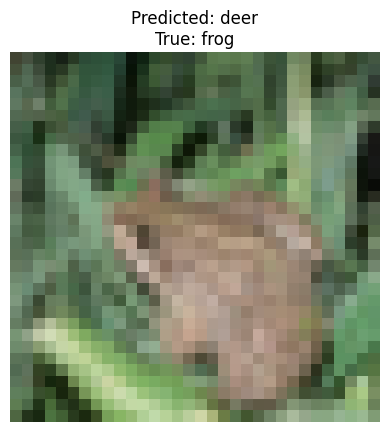

In [8]:
preds = model.predict(X_test[:5])
for i, pred in enumerate(preds):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {class_names[tf.argmax(pred)]}\nTrue: {class_names[y_test[i]]}")
    plt.axis('off')
    plt.show()